Submitted by Shubhangi Mallik(220106134)

## Part 1: Data Cleaning
Data cleaning is a critical step in the data preprocessing phase. It involves handling missing values, removing duplicates, and addressing inconsistencies or errors present in the dataset. By ensuring the cleanliness and reliability of the data, we significantly reduce the likelihood of biased or inaccurate analysis.

Data cleaning plays a pivotal role in achieving "tidy data," which is essential for conducting further operations and analyses effectively. In this section, we will meticulously analyze the data types of variables and correct them if necessary. Additionally, we will identify and handle null values in the dataset.

By adhering to robust data cleaning practices, we ensure that the dataset is in optimal condition for subsequent analysis and modeling.

In [322]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as stats
from statsmodels.formula.api import ols
import statsmodels.api as sm
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV, RandomizedSearchCV
from sklearn.linear_model import LinearRegression, ElasticNet, Ridge, Lasso
from sklearn.preprocessing import StandardScaler, OneHotEncoder, MinMaxScaler
from sklearn.compose import ColumnTransformer
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score, roc_curve, auc, precision_recall_curve, mean_squared_error, mean_absolute_error, r2_score
from sklearn.pipeline import Pipeline
import warnings
warnings.filterwarnings('ignore')
from sklearn.cluster import KMeans
from sklearn.tree import plot_tree
from sklearn import datasets, linear_model, metrics
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.tree import DecisionTreeClassifier

In [382]:
df = pd.read_csv('/Users/shubhangimallik/Downloads/conversion_data.csv')

In [383]:
df.head()

,Unnamed: 0,visitor_id,visitor_location,marketing_channel,gender,product_views_Mon,product_views_Tue,product_views_Wed,product_views_Thu,product_views_Fri,...,time_on_site_Tue,time_on_site_Wed,time_on_site_Thu,time_on_site_Fri,pages_visited_Mon,pages_visited_Tue,pages_visited_Wed,pages_visited_Thu,pages_visited_Fri,converted_Fri
0,0,1,North America,youtube,M,4,5,2,1,2,...,33,23,46,57,4,5,5,4,6,1
1,1,2,South America,organic,F,2,5,0,1,5,...,28,39,24,51,5,6,7,6,2,0
2,2,3,Australia,instagram,M,3,4,0,-3,5,...,34,22,34,31,1,3,3,2,3,1
3,3,4,North America,facebook,M,1,0,0,5,0,...,26,43,22,39,3,4,7,7,1,0
4,4,5,Asia,instagram,F,1,5,2,2,3,...,54,30,47,57,6,6,5,2,4,1


In [384]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 31 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Unnamed: 0         2000 non-null   int64  
 1   visitor_id         2000 non-null   int64  
 2   visitor_location   2000 non-null   object 
 3   marketing_channel  2000 non-null   object 
 4   gender             2000 non-null   object 
 5   product_views_Mon  2000 non-null   int64  
 6   product_views_Tue  2000 non-null   int64  
 7   product_views_Wed  2000 non-null   int64  
 8   product_views_Thu  2000 non-null   int64  
 9   product_views_Fri  2000 non-null   int64  
 10  avg_rating_Mon     2000 non-null   float64
 11  avg_rating_Tue     2000 non-null   float64
 12  avg_rating_Wed     2000 non-null   float64
 13  avg_rating_Thu     2000 non-null   float64
 14  avg_rating_Fri     2000 non-null   float64
 15  avg_price_Mon      2000 non-null   float64
 16  avg_price_Tue      2000 

In [385]:
df.describe(include = 'all')

,Unnamed: 0,visitor_id,visitor_location,marketing_channel,gender,product_views_Mon,product_views_Tue,product_views_Wed,product_views_Thu,product_views_Fri,...,time_on_site_Tue,time_on_site_Wed,time_on_site_Thu,time_on_site_Fri,pages_visited_Mon,pages_visited_Tue,pages_visited_Wed,pages_visited_Thu,pages_visited_Fri,converted_Fri
count,2000.000000,2000.000000,2000,2000,2000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,...,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000
unique,NaN,NaN,5,5,2,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,NaN,South America,instagram,F,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,NaN,433,431,1093,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,999.500000,1000.500000,NaN,NaN,NaN,2.541500,2.440500,2.441000,2.256500,2.354000,...,39.776500,40.155500,40.417000,40.028500,3.946000,4.071000,4.092500,3.921000,4.089500,0.372000
std,577.494589,577.494589,NaN,NaN,NaN,1.704914,1.715206,2.343345,2.370974,2.335682,...,11.855624,11.757399,11.892638,11.664207,2.010001,2.012209,2.002985,2.023316,2.026954,0.483459
min,0.000000,1.000000,NaN,NaN,NaN,0.000000,0.000000,0.000000,-4.000000,-3.000000,...,20.000000,20.000000,20.000000,20.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000
25%,499.750000,500.750000,NaN,NaN,NaN,1.000000,1.000000,0.000000,0.000000,0.000000,...,29.000000,30.000000,30.000000,30.000000,2.000000,2.000000,2.000000,2.000000,2.000000,0.000000
50%,999.500000,1000.500000,NaN,NaN,NaN,3.000000,2.000000,2.000000,2.000000,2.000000,...,40.000000,40.000000,40.500000,40.000000,4.000000,4.000000,4.000000,4.000000,4.000000,0.000000
75%,1499.250000,1500.250000,NaN,NaN,NaN,4.000000,4.000000,4.000000,5.000000,5.000000,...,50.000000,50.000000,51.000000,50.000000,6.000000,6.000000,6.000000,6.000000,6.000000,1.000000


In [386]:
df['product_views_Fri'].describe()

count    2000.000000
mean        2.354000
std         2.335682
min        -3.000000
25%         0.000000
50%         2.000000
75%         5.000000
max         8.000000
Name: product_views_Fri, dtype: float64

In [387]:
df['product_views_Thu'].describe()

count    2000.000000
mean        2.256500
std         2.370974
min        -4.000000
25%         0.000000
50%         2.000000
75%         5.000000
max         8.000000
Name: product_views_Thu, dtype: float64

In [388]:
df['product_views_Wed'].describe()

count    2000.000000
mean        2.441000
std         2.343345
min         0.000000
25%         0.000000
50%         2.000000
75%         4.000000
max         9.000000
Name: product_views_Wed, dtype: float64

In [389]:
df.isnull().sum()

Unnamed: 0           0
visitor_id           0
visitor_location     0
marketing_channel    0
gender               0
product_views_Mon    0
product_views_Tue    0
product_views_Wed    0
product_views_Thu    0
product_views_Fri    0
avg_rating_Mon       0
avg_rating_Tue       0
avg_rating_Wed       0
avg_rating_Thu       0
avg_rating_Fri       0
avg_price_Mon        0
avg_price_Tue        0
avg_price_Wed        0
avg_price_Thu        0
avg_price_Fri        0
time_on_site_Mon     0
time_on_site_Tue     0
time_on_site_Wed     0
time_on_site_Thu     0
time_on_site_Fri     0
pages_visited_Mon    0
pages_visited_Tue    0
pages_visited_Wed    0
pages_visited_Thu    0
pages_visited_Fri    0
converted_Fri        0
dtype: int64

In [390]:
df2=df.drop_duplicates

In [391]:
df.drop(columns=['Unnamed: 0'], inplace=True)

In [392]:
df

,visitor_id,visitor_location,marketing_channel,gender,product_views_Mon,product_views_Tue,product_views_Wed,product_views_Thu,product_views_Fri,avg_rating_Mon,...,time_on_site_Tue,time_on_site_Wed,time_on_site_Thu,time_on_site_Fri,pages_visited_Mon,pages_visited_Tue,pages_visited_Wed,pages_visited_Thu,pages_visited_Fri,converted_Fri
0,1,North America,youtube,M,4,5,2,1,2,3.90,...,33,23,46,57,4,5,5,4,6,1
1,2,South America,organic,F,2,5,0,1,5,1.31,...,28,39,24,51,5,6,7,6,2,0
2,3,Australia,instagram,M,3,4,0,-3,5,3.26,...,34,22,34,31,1,3,3,2,3,1
3,4,North America,facebook,M,1,0,0,5,0,2.66,...,26,43,22,39,3,4,7,7,1,0
4,5,Asia,instagram,F,1,5,2,2,3,2.76,...,54,30,47,57,6,6,5,2,4,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,1996,Europe,organic,F,3,0,0,4,2,4.80,...,22,51,44,29,5,1,5,7,7,0
1996,1997,South America,google,M,1,2,0,4,1,1.34,...,54,33,59,38,1,6,6,7,6,0
1997,1998,Asia,facebook,M,2,3,0,0,8,2.56,...,32,30,48,38,2,1,7,6,4,0
1998,1999,South America,youtube,F,2,2,2,5,5,4.49,...,21,51,41,56,6,4,2,2,3,1


## Initial Hypothesis:

 Visitors who spend the most amount of time on the website throughout the week end up converting by the end of the week. Users with higher total views and also users who are viewing more expensive items are more likely to convert as they might be more serious about the purchase. It can also be said that individuals who are viewing on average the highest rated products will convert more. Additionally, individuals who have reached the site organically should have a higher chance of converting

<Axes: xlabel='converted_Fri', ylabel='visitor_location'>

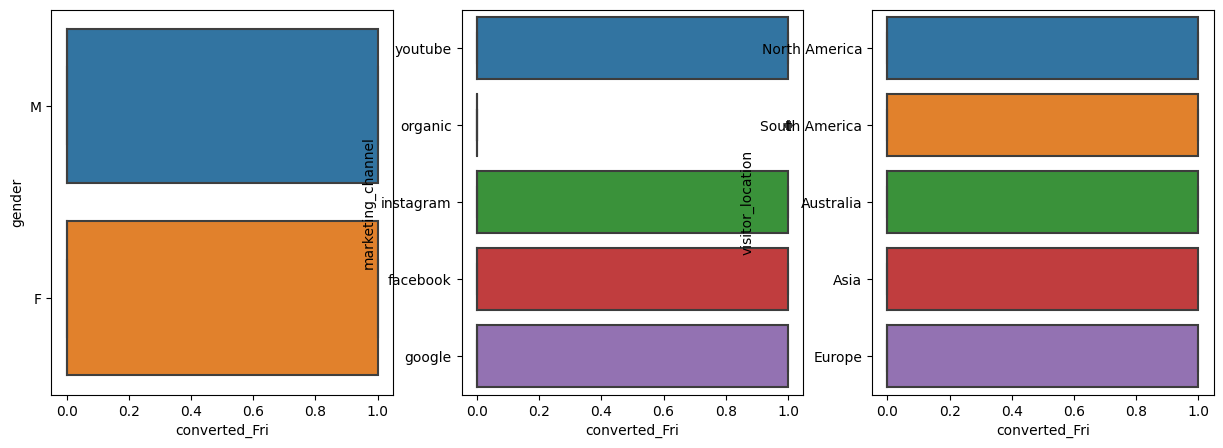

In [393]:
# check continuous variables first > age, work experience, family size > compare them to output variable

fig, (ax1, ax2, ax3) = plt.subplots(1,3, figsize=(15,5))
sns.boxplot(x='converted_Fri',y='gender', data=df, ax=ax1)
sns.boxplot(x='converted_Fri',y='marketing_channel',data=df, ax=ax2)
sns.boxplot(x='converted_Fri',y='visitor_location', data=df, ax=ax3)

Gender and location do not appear to play a significant role in conversions on friday. All the marketing channels seem to be working similarily when it comes to conversions. Organic conversions are the only ones that stand out here

In [394]:
df.groupby(['gender','converted_Fri'])['visitor_id'].count().unstack()

converted_Fri,0,1
gender,,
F,602,491
M,654,253


In [395]:
df.groupby(['marketing_channel','converted_Fri'])['visitor_id'].count().unstack()

converted_Fri,0,1
marketing_channel,,
facebook,238,156
google,234,165
instagram,257,174
organic,311,96
youtube,216,153


In [396]:
df.groupby(['visitor_location','converted_Fri'])['visitor_id'].count().unstack()

converted_Fri,0,1
visitor_location,,
Asia,231,138
Australia,268,135
Europe,235,148
North America,267,145
South America,255,178


In [397]:
numerical_columns =['product_views_Mon','product_views_Tue','product_views_Wed','product_views_Thu','product_views_Fri','avg_rating_Mon','avg_rating_Tue','avg_rating_Wed','avg_rating_Thu','avg_rating_Fri','avg_price_Mon','avg_price_Tue','avg_price_Wed','avg_price_Thu','avg_price_Fri','time_on_site_Mon','time_on_site_Tue','time_on_site_Wed','time_on_site_Thu','time_on_site_Fri','pages_visited_Mon','pages_visited_Tue','pages_visited_Wed','pages_visited_Thu','pages_visited_Fri']

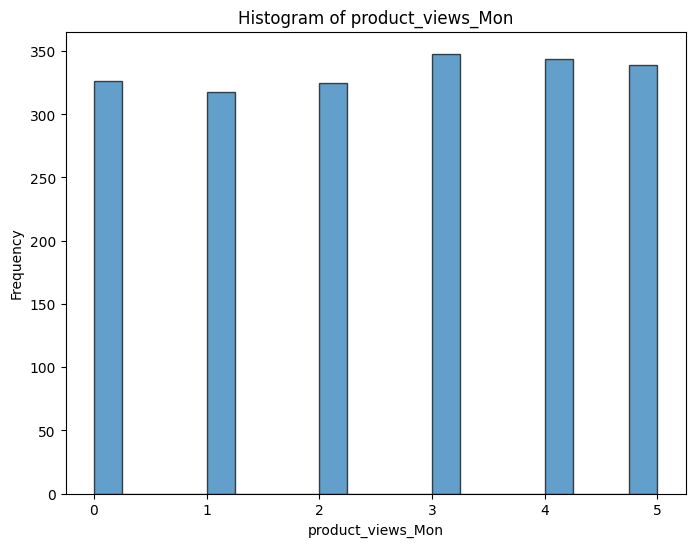

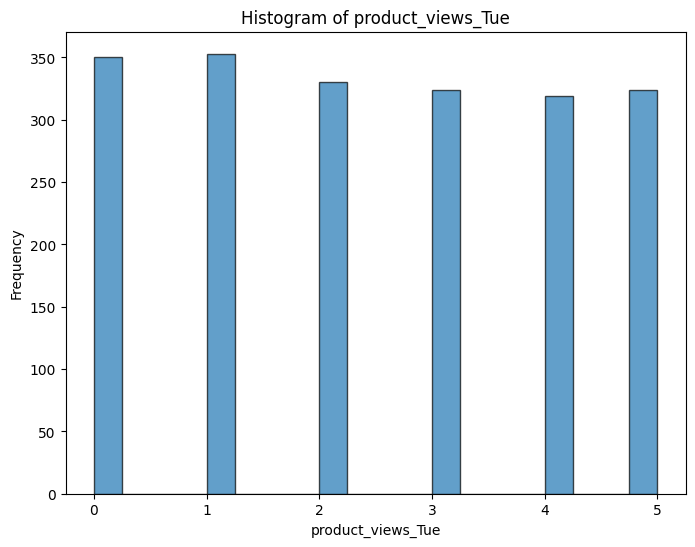

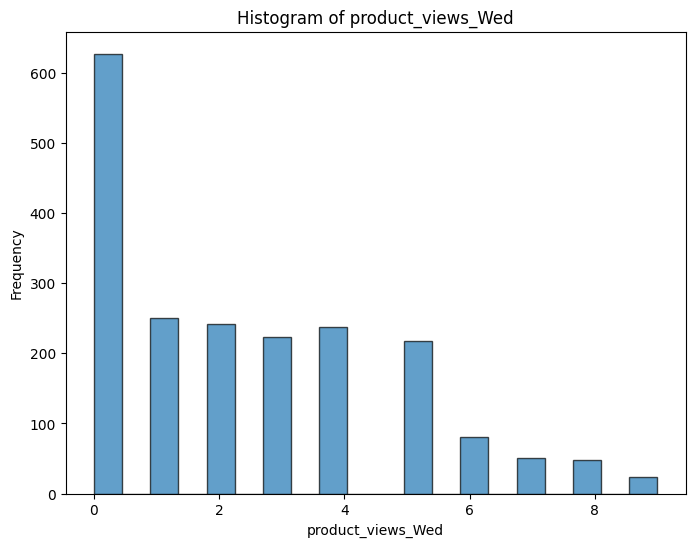

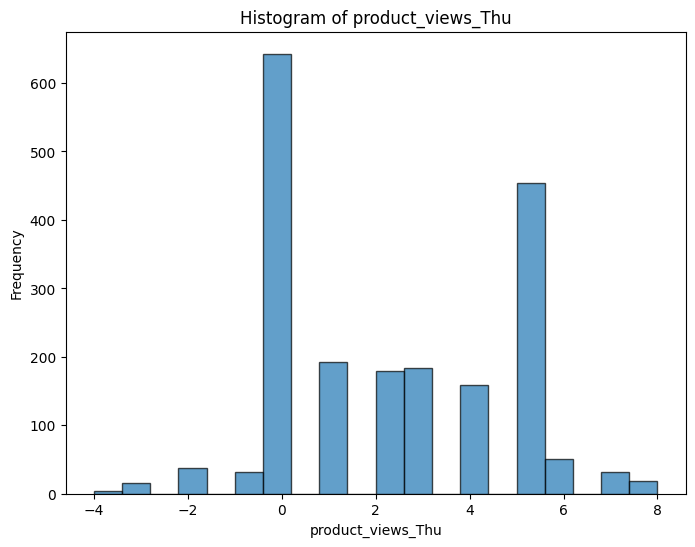

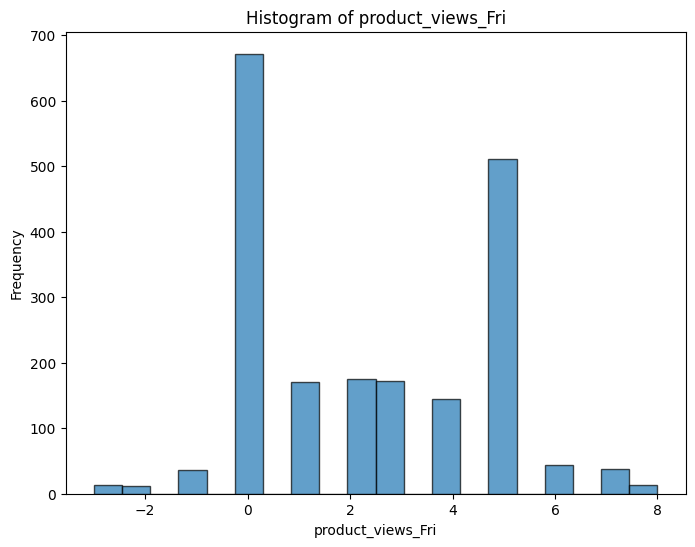

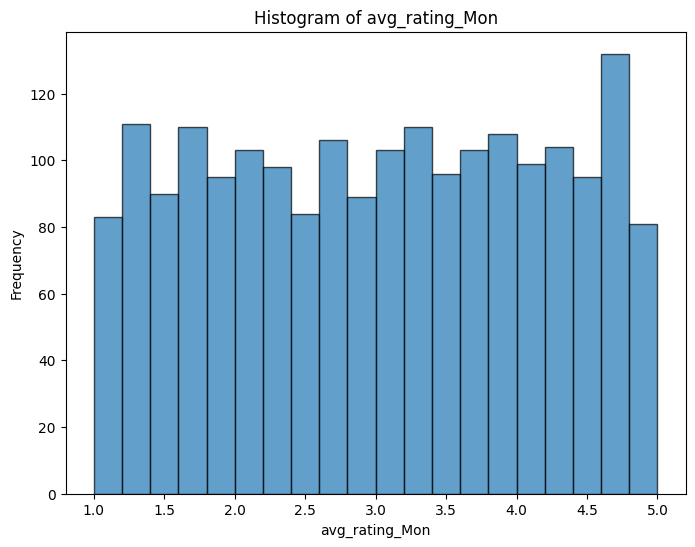

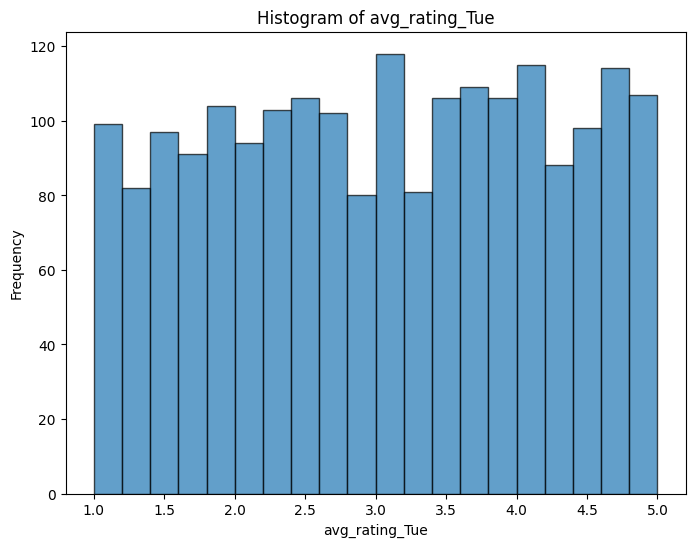

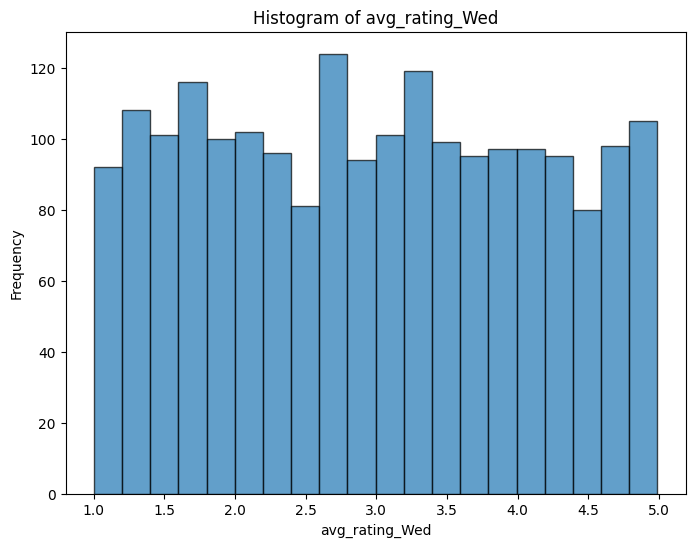

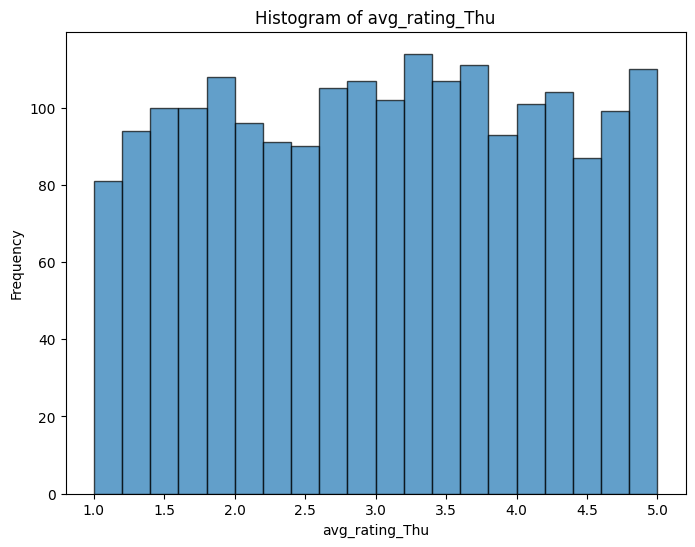

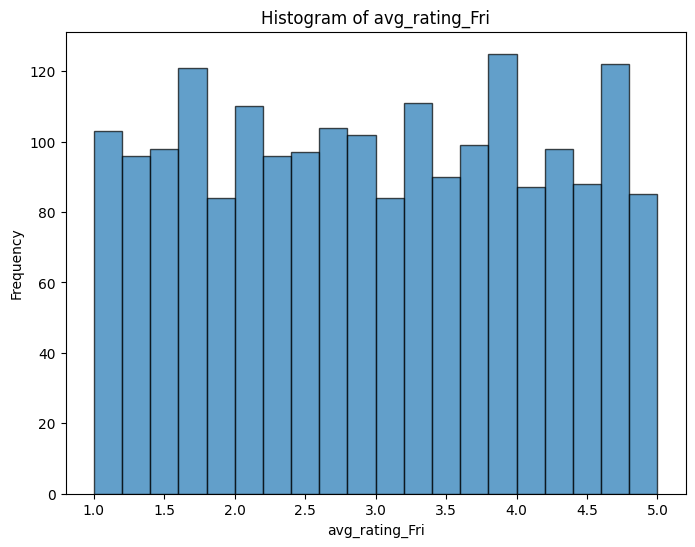

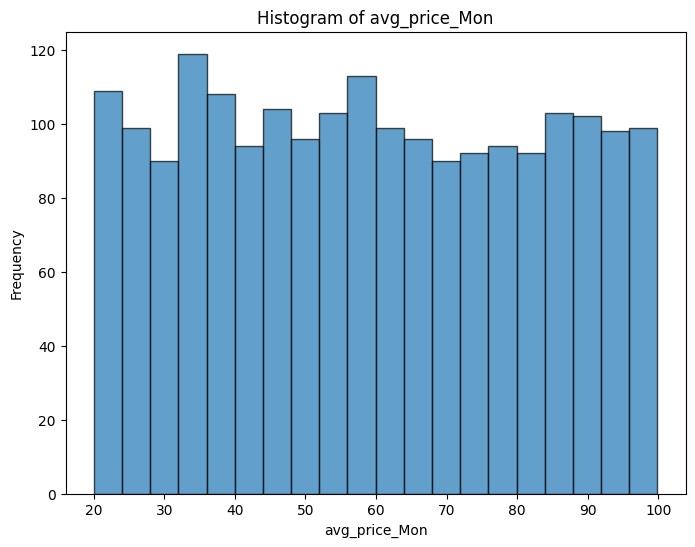

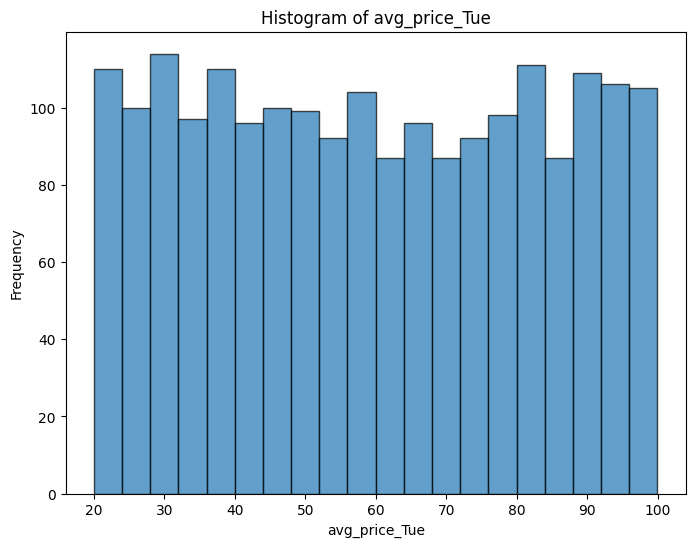

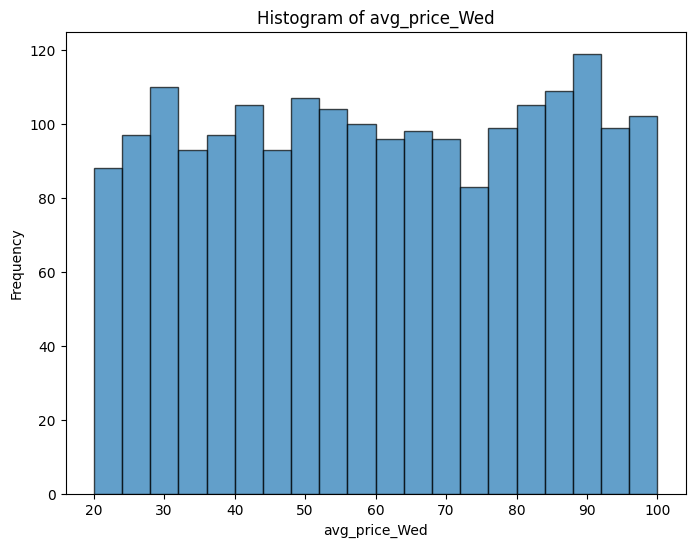

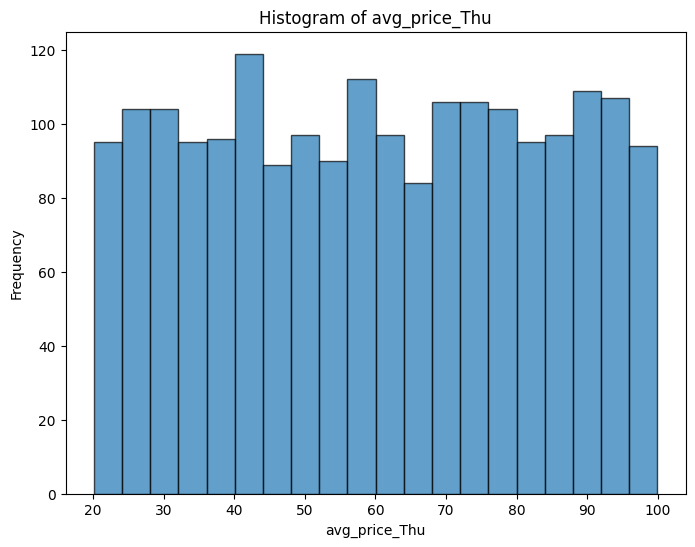

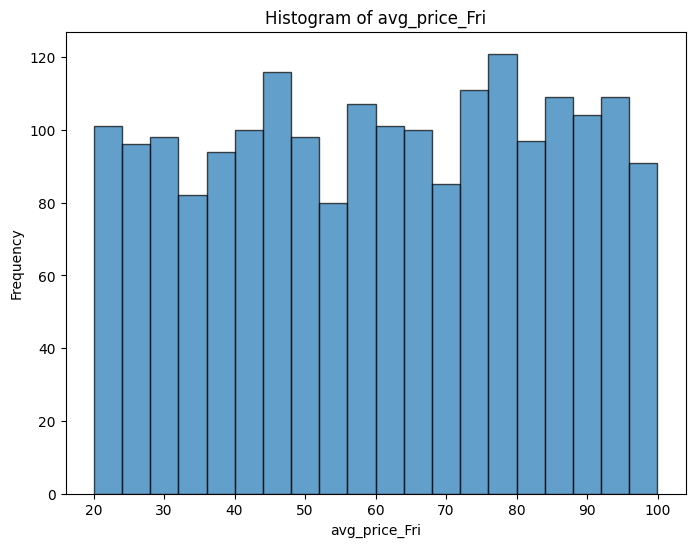

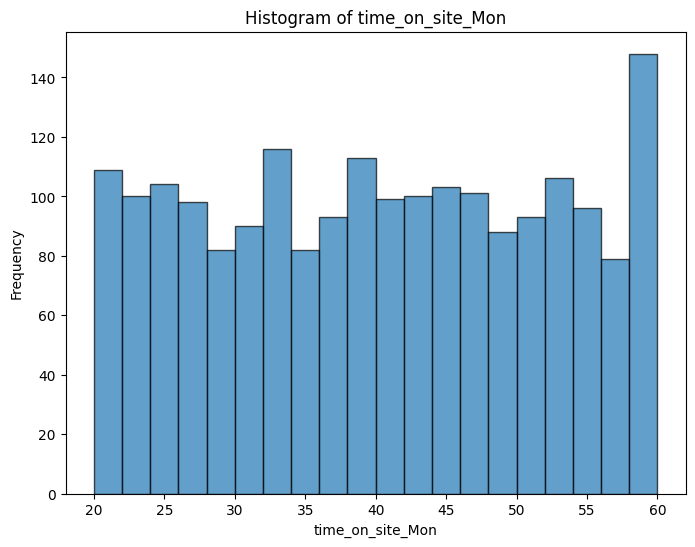

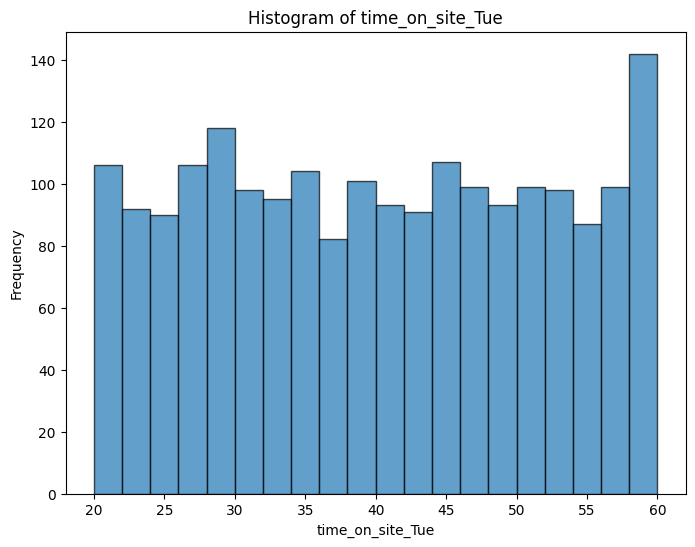

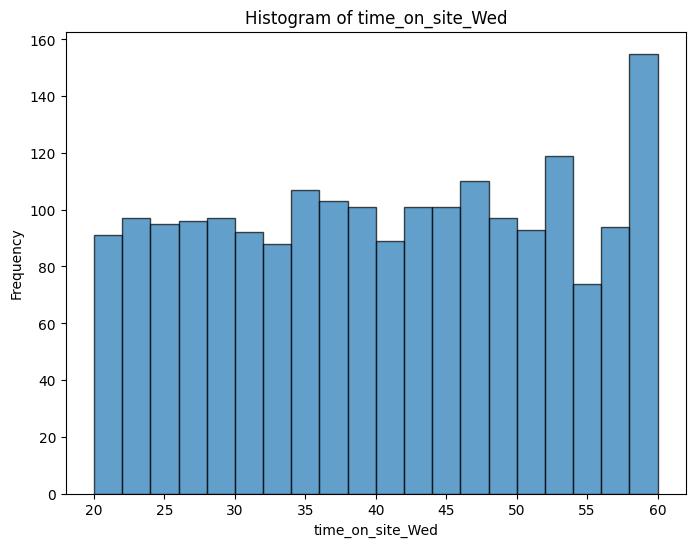

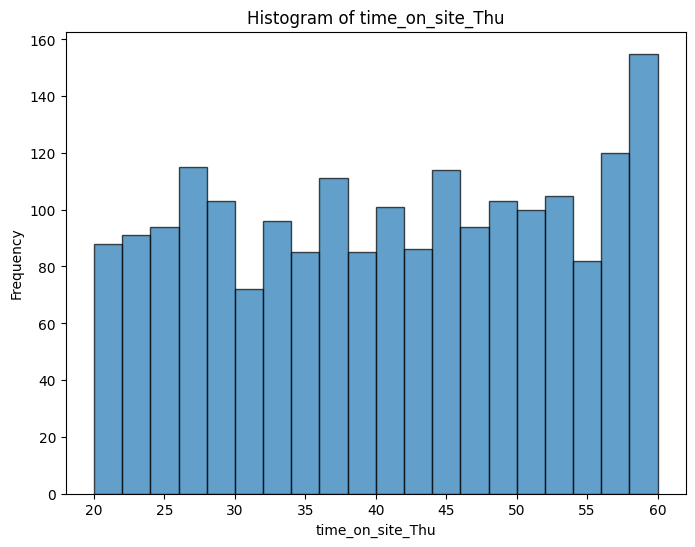

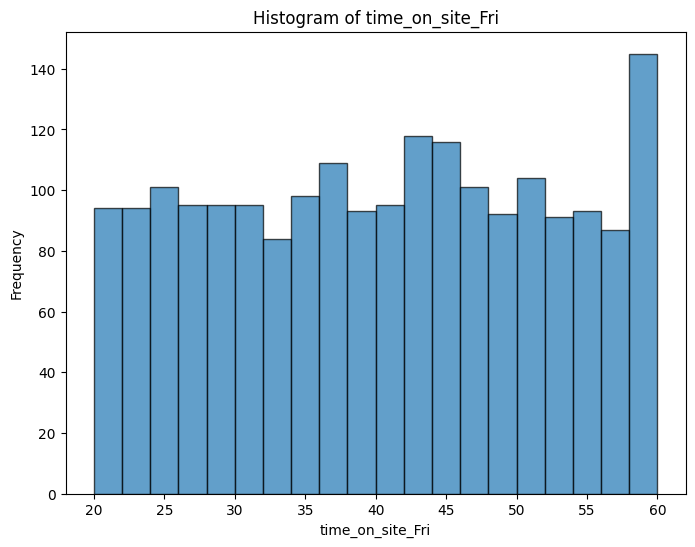

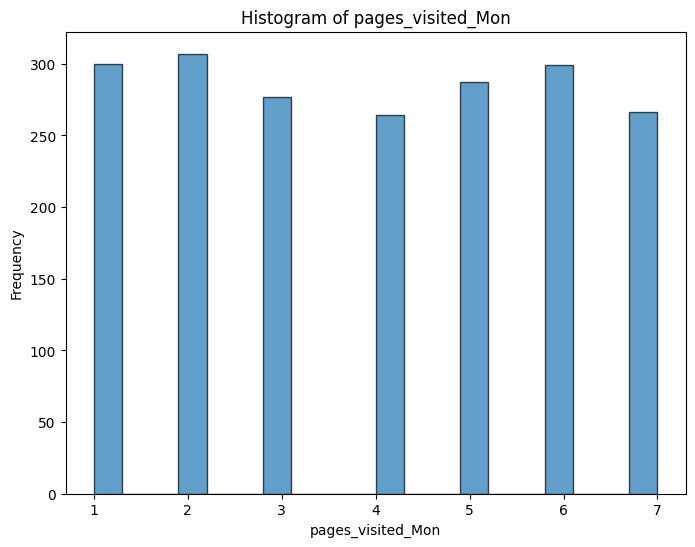

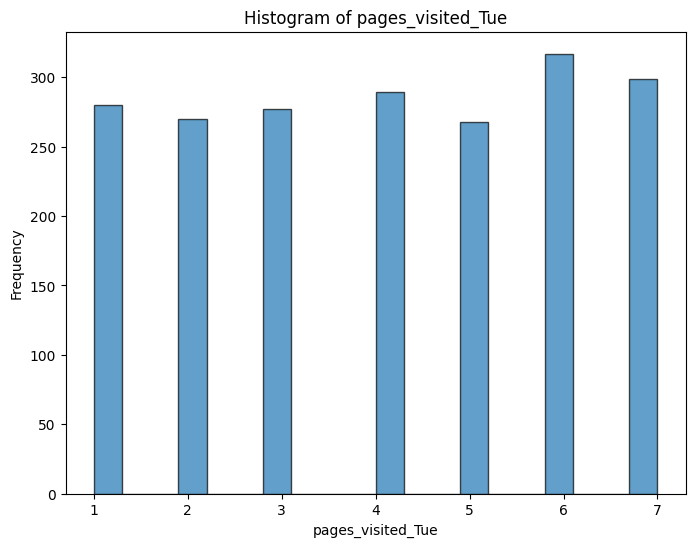

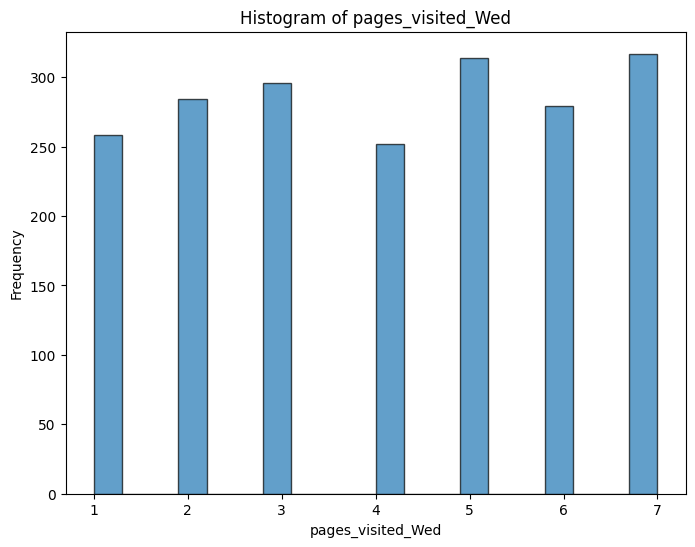

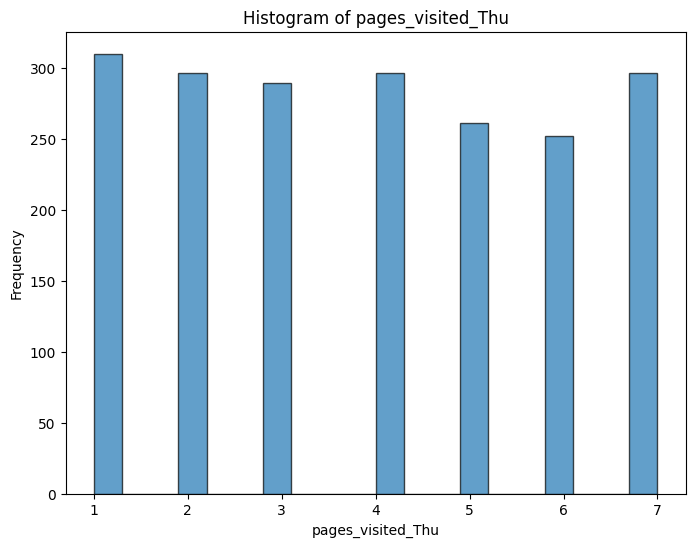

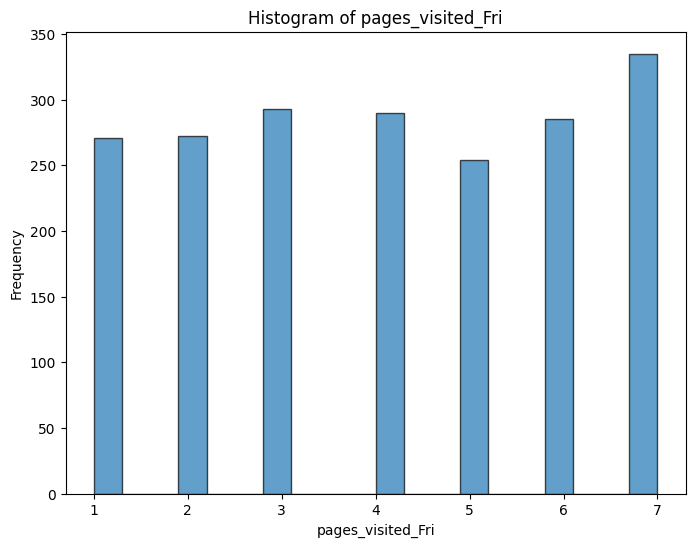

In [398]:
# plot the histogram fo reach numerical columns so we can better make decisions on dropping outliers

# Set the number of bins for the histogram
num_bins = 20

# Plot histograms for each numerical column and see their skewness and tailness visually, added alpha feature here as not adding this feature will help the graphs display distribution precisely.
for column in numerical_columns:
    plt.figure(figsize=(8, 6))  # Adjust the figure size as per your preference
    plt.hist(df[column], bins=num_bins, edgecolor='black', alpha=0.7)  # Added transparency
    plt.title(f'Histogram of {column}')
    plt.xlabel(column)
    plt.ylabel('Frequency')
    plt.show()

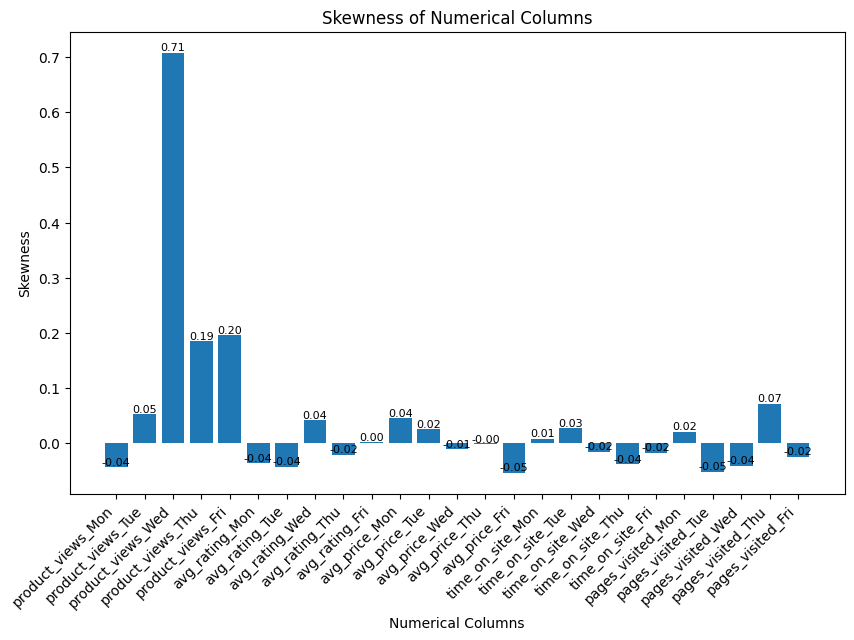

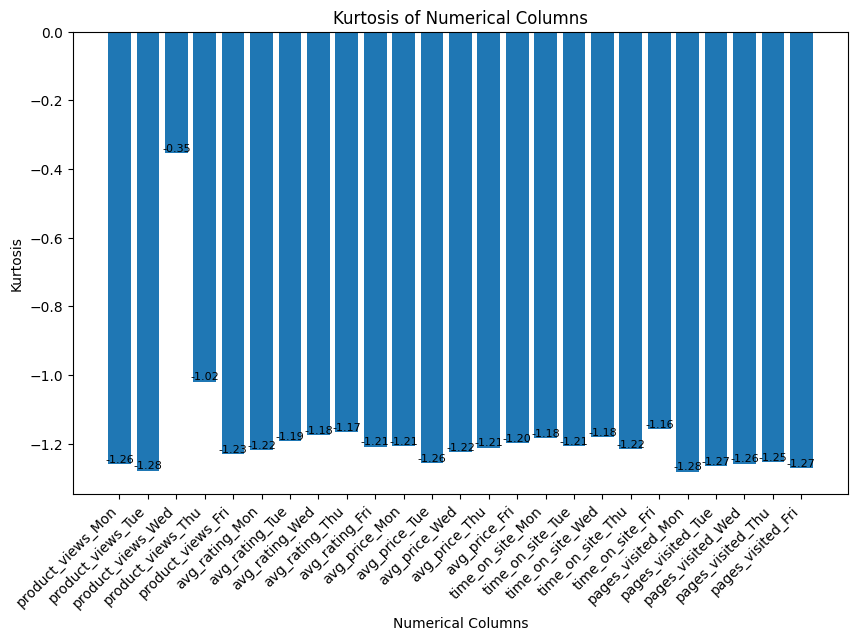

In [399]:
# Another version, we combined all the numerical value in two graphs with each skweness value and kurtosis value in each column for easy interpretation.
from scipy.stats import skew, kurtosis
# Calculate skewness and kurtosis for each numerical column
skewness_list = [skew(df[column].dropna()) for column in numerical_columns]
kurtosis_list = [kurtosis(df[column].dropna()) for column in numerical_columns]

# Plot the graph for skewness
plt.figure(figsize=(10, 6))
plt.bar(numerical_columns, skewness_list)
plt.title('Skewness of Numerical Columns')
plt.xlabel('Numerical Columns')
plt.ylabel('Skewness')
plt.xticks(rotation=45, ha='right')

# Label each bar with the column name and skewness value
for i, v in enumerate(skewness_list):
    plt.text(i, v, f'{skewness_list[i]:.2f}', ha='center', va='bottom', fontsize=8)

plt.show()

# Plot the graph for kurtosis
plt.figure(figsize=(10, 6))
plt.bar(numerical_columns, kurtosis_list)
plt.title('Kurtosis of Numerical Columns')
plt.xlabel('Numerical Columns')
plt.ylabel('Kurtosis')
plt.xticks(rotation=45, ha='right')

# Label each bar with the column name and kurtosis value
for i, v in enumerate(kurtosis_list):
    plt.text(i, v, f'{kurtosis_list[i]:.2f}', ha='center', va='bottom', fontsize=8)

plt.show()

In [400]:
# Calculate skewness and kurtosis for each numerical column, this time, we choose to display them in text format.
for column in numerical_columns:
    skewness_values = []
    s = skew(df[column])
    k = kurtosis(df[column])
    print(f'{column}: skewness = {s}, kurtosis = {k}')

product_views_Mon: skewness = -0.04339723992227179, kurtosis = -1.2595334694359583
product_views_Tue: skewness = 0.05239895534857225, kurtosis = -1.278349926686584
product_views_Wed: skewness = 0.7078649532941341, kurtosis = -0.35422487943281133
product_views_Thu: skewness = 0.18508333245295, kurtosis = -1.019154529926297
product_views_Fri: skewness = 0.19578852072874067, kurtosis = -1.230292770208432
avg_rating_Mon: skewness = -0.036569401570234646, kurtosis = -1.2192260019428236
avg_rating_Tue: skewness = -0.04306188757167769, kurtosis = -1.192970789047595
avg_rating_Wed: skewness = 0.04108520953174745, kurtosis = -1.175952222375065
avg_rating_Thu: skewness = -0.021059652207191585, kurtosis = -1.1665255431135517
avg_rating_Fri: skewness = 0.0011903008781474437, kurtosis = -1.2093578638463074
avg_price_Mon: skewness = 0.04475490871743474, kurtosis = -1.2066916544930508
avg_price_Tue: skewness = 0.02480764664794289, kurtosis = -1.2566830578426142
avg_price_Wed: skewness = -0.0111900869

In [401]:
#based on skewness and kurtosis, we use z score to remove outliers
if abs(s) > 1:
        df[column] = df[column].apply(lambda x: np.log(x + 1))

In [402]:
from scipy.stats import zscore
z_scores = zscore(df[numerical_columns])

In [403]:
z_scores = zscore(df[numerical_columns])

In [404]:
threshold = 3

In [405]:
df= df[(np.abs(z_scores) < threshold).all(axis=1)]

In [406]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 30 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   visitor_id         2000 non-null   int64  
 1   visitor_location   2000 non-null   object 
 2   marketing_channel  2000 non-null   object 
 3   gender             2000 non-null   object 
 4   product_views_Mon  2000 non-null   int64  
 5   product_views_Tue  2000 non-null   int64  
 6   product_views_Wed  2000 non-null   int64  
 7   product_views_Thu  2000 non-null   int64  
 8   product_views_Fri  2000 non-null   int64  
 9   avg_rating_Mon     2000 non-null   float64
 10  avg_rating_Tue     2000 non-null   float64
 11  avg_rating_Wed     2000 non-null   float64
 12  avg_rating_Thu     2000 non-null   float64
 13  avg_rating_Fri     2000 non-null   float64
 14  avg_price_Mon      2000 non-null   float64
 15  avg_price_Tue      2000 non-null   float64
 16  avg_price_Wed      2000 

In [407]:
descriptive_stats = df.describe()
print(descriptive_stats)

        visitor_id  product_views_Mon  product_views_Tue  product_views_Wed   
count  2000.000000        2000.000000        2000.000000        2000.000000  \
mean   1000.500000           2.541500           2.440500           2.441000   
std     577.494589           1.704914           1.715206           2.343345   
min       1.000000           0.000000           0.000000           0.000000   
25%     500.750000           1.000000           1.000000           0.000000   
50%    1000.500000           3.000000           2.000000           2.000000   
75%    1500.250000           4.000000           4.000000           4.000000   
max    2000.000000           5.000000           5.000000           9.000000   

       product_views_Thu  product_views_Fri  avg_rating_Mon  avg_rating_Tue   
count        2000.000000        2000.000000     2000.000000     2000.000000  \
mean            2.256500           2.354000        3.023990        3.042760   
std             2.370974           2.335682        

## Part 2: Feature Engineering 
Feature engineering is a critical step in the data preprocessing pipeline in this model as we transform and select relevant features from the raw data to improve the performance of the model.

In [408]:
# Sum of engagement metrics
df['total_product_views'] = df[['product_views_Mon', 'product_views_Tue', 'product_views_Wed', 'product_views_Thu', 'product_views_Fri']].sum(axis=1)
df['total_avg_rating'] = df[['avg_rating_Mon', 'avg_rating_Tue', 'avg_rating_Wed', 'avg_rating_Thu', 'avg_rating_Fri']].sum(axis=1)
df['total_avg_price'] = df[['avg_price_Mon', 'avg_price_Tue', 'avg_price_Wed', 'avg_price_Thu', 'avg_price_Fri']].sum(axis=1)

In [409]:
# Interaction features
df['product_views_rating_interaction'] = df['total_product_views'] * df['total_avg_rating']

In [410]:
df['total_product_views'].describe(include='all')

count    2000.000000
mean       12.033500
std         4.847177
min        -3.000000
25%         9.000000
50%        12.000000
75%        15.000000
max        28.000000
Name: total_product_views, dtype: float64

In [411]:
# Putting total_product_views into bins
bins = [0,4,10,16,29]
labels = ['0-3','3-9', '9-15', '15-28']
df['total_product_views_bins'] = pd.cut(df['total_product_views'], bins=bins, labels=labels, right=False)

In [412]:
df['total_avg_rating'].describe(include='all')

count    2000.000000
mean       15.053515
std         2.618832
min         7.360000
25%        13.280000
50%        15.030000
75%        16.880000
max        22.870000
Name: total_avg_rating, dtype: float64

In [413]:
# Putting total_average_rating into bins
bins = [0,11,21]
labels = ['0-10','10-20']
df['total_avg_rating_bins'] = pd.cut(df['total_avg_rating'], bins=bins, labels=labels, right=False)

In [414]:
df['total_avg_price'].describe(include='all')

count    2000.000000
mean      300.452690
std        51.191997
min       137.600000
25%       263.617500
50%       299.595000
75%       334.115000
max       460.640000
Name: total_avg_price, dtype: float64

<Axes: xlabel='converted_Fri', ylabel='total_product_views'>

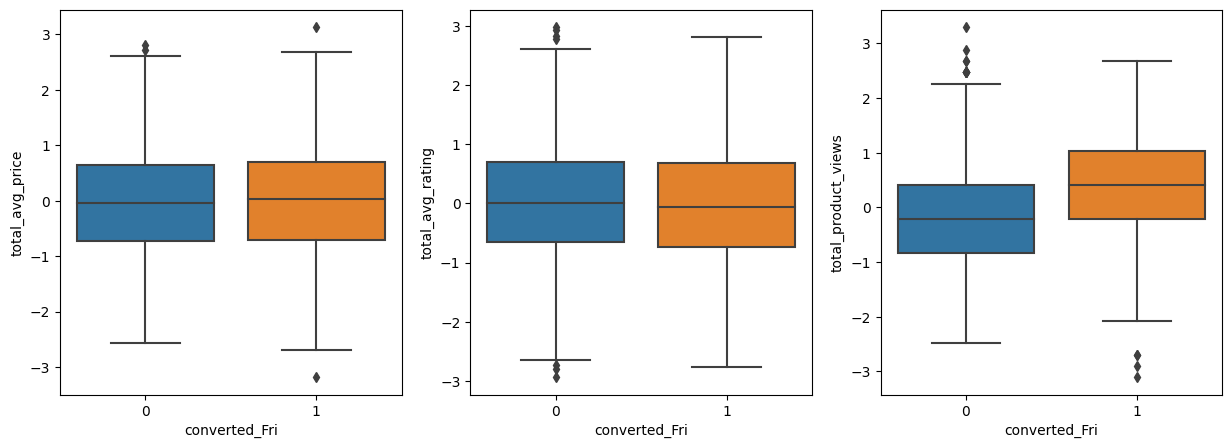

In [484]:

fig, (ax1, ax2, ax3) = plt.subplots(1,3, figsize=(15,5))
sns.boxplot(x='converted_Fri',y='total_avg_price', data=df, ax=ax1)
sns.boxplot(x='converted_Fri',y='total_avg_rating',data=df, ax=ax2)
sns.boxplot(x='converted_Fri',y='total_product_views', data=df, ax=ax3)

In [415]:
# Putting total_average_price into bins
bins = [0,150,300,500]
labels = ['0-150','150-300','300-500']
df['total_avg_price_bins'] = pd.cut(df['total_avg_price'], bins=bins, labels=labels, right=False)

In [416]:
scaler = StandardScaler()
scaled_features = scaler.fit_transform(df[['total_product_views', 'total_avg_rating', 'total_avg_price']])
df[['total_product_views', 'total_avg_rating', 'total_avg_price']] = scaled_features

In [417]:
# Encoding categorical variables
df = pd.get_dummies(df,columns=['gender', 'visitor_location', 'marketing_channel'], drop_first=True)

## Part 3: Data Preprocessing
In order to input data to the model, we will be preprocessing it.

In [418]:
df.columns

Index(['visitor_id', 'product_views_Mon', 'product_views_Tue',
       'product_views_Wed', 'product_views_Thu', 'product_views_Fri',
       'avg_rating_Mon', 'avg_rating_Tue', 'avg_rating_Wed', 'avg_rating_Thu',
       'avg_rating_Fri', 'avg_price_Mon', 'avg_price_Tue', 'avg_price_Wed',
       'avg_price_Thu', 'avg_price_Fri', 'time_on_site_Mon',
       'time_on_site_Tue', 'time_on_site_Wed', 'time_on_site_Thu',
       'time_on_site_Fri', 'pages_visited_Mon', 'pages_visited_Tue',
       'pages_visited_Wed', 'pages_visited_Thu', 'pages_visited_Fri',
       'converted_Fri', 'total_product_views', 'total_avg_rating',
       'total_avg_price', 'product_views_rating_interaction',
       'total_product_views_bins', 'total_avg_rating_bins',
       'total_avg_price_bins', 'gender_M', 'visitor_location_Australia',
       'visitor_location_Europe', 'visitor_location_North America',
       'visitor_location_South America', 'marketing_channel_google',
       'marketing_channel_instagram', 'marketi

In [420]:
X = df.drop(columns=['converted_Fri'])
y = df['converted_Fri']


In [423]:
# Divide columns into categorical, numerical and the target column
cat_columns = ['total_avg_price_bins','total_avg_rating_bins','total_product_views_bins']
num_columns = ['product_views_rating_interaction','total_avg_price','total_avg_rating','total_product_views']
target = 'converted_Fri'

In [425]:
# Split data into Train and test
X_train, X_test, y_train, y_test = train_test_split(df[cat_columns + num_columns], df[target], test_size=0.2, random_state=123)

In [426]:
cat_transformer = Pipeline(steps = [('onehot', OneHotEncoder(handle_unknown='ignore'))])
num_transformer = Pipeline(steps = [('scaler', StandardScaler())])
preprocessor = ColumnTransformer(transformers = [('cat',cat_transformer, cat_columns),
                                                 ('num', num_transformer, num_columns)])

## Part 4: Model Selection and Analysis
To decide on a model, we will be testing out a few models. Since ours is a binary classification problem of whether a user converted or not, we will be using 4 classification models as follows:

In [427]:
log = LogisticRegression()
knn = KNeighborsClassifier()
nb = GaussianNB()
svc = SVC()

In [428]:
knn_pipeline = Pipeline(steps = [
    ('preprocessor', preprocessor),
    ('classifier', knn)
])

In [429]:
log_pipeline = Pipeline(steps = [
    ('preprocessor', preprocessor),
    ('classifier', log)
])

In [430]:
nb_pipeline = Pipeline(steps = [
    ('preprocessor', preprocessor),
    ('classifier', nb)
])

In [431]:
svc_pipeline = Pipeline(steps = [
    ('preprocessor', preprocessor),
    ('classifier', svc)
])


In [432]:
y_train.shape

(1600,)

In [433]:
y_test.shape

(400,)

In [434]:
x_train_transformed = preprocessor.fit_transform(X_train)
x_test_transformed = preprocessor.fit_transform(X_test)

In [435]:
x_train_transformed.shape

(1600, 15)

In [436]:
x_test_transformed.shape

(400, 13)

In [437]:
log_pipeline.fit(X_train, y_train)
nb_pipeline.fit(X_train, y_train)
knn_pipeline.fit(X_train, y_train)
svc_pipeline.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('cat',
                                                  Pipeline(steps=[('onehot',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['total_avg_price_bins',
                                                   'total_avg_rating_bins',
                                                   'total_product_views_bins']),
                                                 ('num',
                                                  Pipeline(steps=[('scaler',
                                                                   StandardScaler())]),
                                                  ['product_views_rating_interaction',
                                                   'total_avg_price',
                                                   'total_avg_rating',
                                                   'total_product_views'])])),
                ('classifier', SVC())])

In [438]:
pred_log = log_pipeline.predict(X_test)
pred_knn = knn_pipeline.predict(X_test)
pred_nb = nb_pipeline.predict(X_test)
pred_svc = svc_pipeline.predict(X_test)

In [439]:
print(f1_score(pred_log, y_test))
print(f1_score(pred_nb, y_test))
print(f1_score(pred_knn, y_test))
print(f1_score(pred_svc, y_test))

0.4773662551440329
0.0
0.5018450184501845
0.4773662551440329


In [440]:
print(recall_score(pred_log, y_test))
print(recall_score(pred_nb, y_test))
print(recall_score(pred_knn, y_test))
print(recall_score(pred_svc, y_test))

0.5742574257425742
0.0
0.5271317829457365
0.5742574257425742


In [441]:
print(precision_score(pred_log, y_test))
print(precision_score(pred_nb, y_test))
print(precision_score(pred_knn, y_test))
print(precision_score(pred_svc, y_test))

0.4084507042253521
0.0
0.4788732394366197
0.4084507042253521


In [443]:
X_encoded = pd.get_dummies(X, columns=cat_columns, dtype=int)

In [445]:
X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, random_state=123)

In [446]:
d_tree = DecisionTreeClassifier(random_state=42, max_depth=8)
d_tree.fit(X_train,y_train)
y_pred = d_tree.predict(X_test)

In [447]:
print("Decsision Tree Model Accuracy (in %):",
metrics.accuracy_score(y_test, y_pred) * 100)

Decsision Tree Model Accuracy (in %): 89.4


In [448]:
knn = KNeighborsClassifier(n_neighbors=100)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)

In [449]:
print("KNN Model Accuracy (in %):",
metrics.accuracy_score(y_test, y_pred) * 100)

KNN Model Accuracy (in %): 67.0


In [450]:
rforest = RandomForestClassifier(n_estimators = 200)
rforest.fit(X_train, y_train)
y_pred = rforest.predict(X_test)

In [451]:
print("Random Forest Model Accuracy (in %):",
metrics.accuracy_score(y_test, y_pred) * 100)

Random Forest Model Accuracy (in %): 88.6


In [452]:
gnb = GaussianNB()
param_grid = {'var_smoothing': [1e-9, 1e-8, 1e-7] }
grid_search = GridSearchCV(gnb, param_grid, cv=5, scoring='recall')
grid_search.fit(X_train, y_train)
best_model = grid_search.best_estimator_
cv_scores_nb = cross_val_score(best_model, X_train, y_train, cv=5, scoring='recall')
print("Cross-validation scores for Gaussian Naive Bayes: ", cv_scores_nb)
y_pred_gnb = best_model.predict(X_test)
print("Classification Report:")
print(classification_report(y_test, y_pred))

Cross-validation scores for Gaussian Naive Bayes:  [0.71052632 0.74336283 0.71681416 0.69911504 0.7079646 ]
Classification Report:
              precision    recall  f1-score   support

           0       0.90      0.92      0.91       322
           1       0.85      0.82      0.84       178

    accuracy                           0.89       500
   macro avg       0.88      0.87      0.87       500
weighted avg       0.89      0.89      0.89       500



In [453]:
param_grid = {
    'solver': ['newton-cg', 'lbfgs', 'liblinear'],
    'max_iter': [50, 100, 200],
    'C': [0.01, 0.1, 1, 10]
}
grid_search = GridSearchCV(
    estimator=LogisticRegression(),
    param_grid=param_grid,
    scoring='accuracy',
    cv=5,
    verbose=1,
    n_jobs=-1
)
grid_search.fit(X_train, y_train)
best_params = grid_search.best_params_
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)

Fitting 5 folds for each of 36 candidates, totalling 180 fits


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://sciki

In [454]:
log_reg = linear_model.LogisticRegression(solver = 'newton-cg', max_iter=50)
log_reg.fit(X_train, y_train)
y_pred = log_reg.predict(X_test)

In [455]:
print("Logistic Regression Model Accuracy (in %):",
metrics.accuracy_score(y_test, y_pred) * 100)

Logistic Regression Model Accuracy (in %): 74.0


In [457]:
params_knn = {'n_neighbors': list(range(1,500)), 'weights': ['uniform', 'distance'], 'metric': ['l1', 'euclidean', 'manhattan', 'sokalsneath', 'hamming', 'sokalmichener', 'rogerstanimoto', 'braycurtis', 'dice', 'jaccard', 'pyfunc', 'haversine', 'matching', 'cityblock', 'correlation', 'l2', 'nan_euclidean', 'chebyshev', 'p', 'wminkowski', 'minkowski', 'cosine', 'infinity', 'russellrao', 'seuclidean', 'canberra', 'kulsinski', 'sqeuclidean', 'yule', 'mahalanobis'] }
randomsearch_knn = RandomizedSearchCV(knn, params_knn, cv=10, n_iter=100, scoring='accuracy')

randomsearch_knn.fit(X_train, y_train)

print("Best parameters from RandomSearch: ", randomsearch_knn.best_params_)

Best parameters from RandomSearch:  {'weights': 'distance', 'n_neighbors': 434, 'metric': 'kulsinski'}


In [458]:
knn_best = KNeighborsClassifier(**randomsearch_knn.best_params_)
cv_scores_knn = cross_val_score(knn_best, X_train, y_train, cv=5, scoring='accuracy')
knn_best.fit(X_train, y_train)
y_pred_knn = knn_best.predict(X_test)

In [463]:
print(cv_scores_knn)
print("\nK-Nearest Neighbors Metrics: ")
print("Accuracy: ", accuracy_score(y_test, y_pred_knn))

[0.77333333 0.78       0.79       0.81666667 0.78      ]

K-Nearest Neighbors Metrics: 
Accuracy:  0.796


In [467]:
dt = DecisionTreeClassifier(random_state=123)
dt = dt.fit(X_train, y_train)

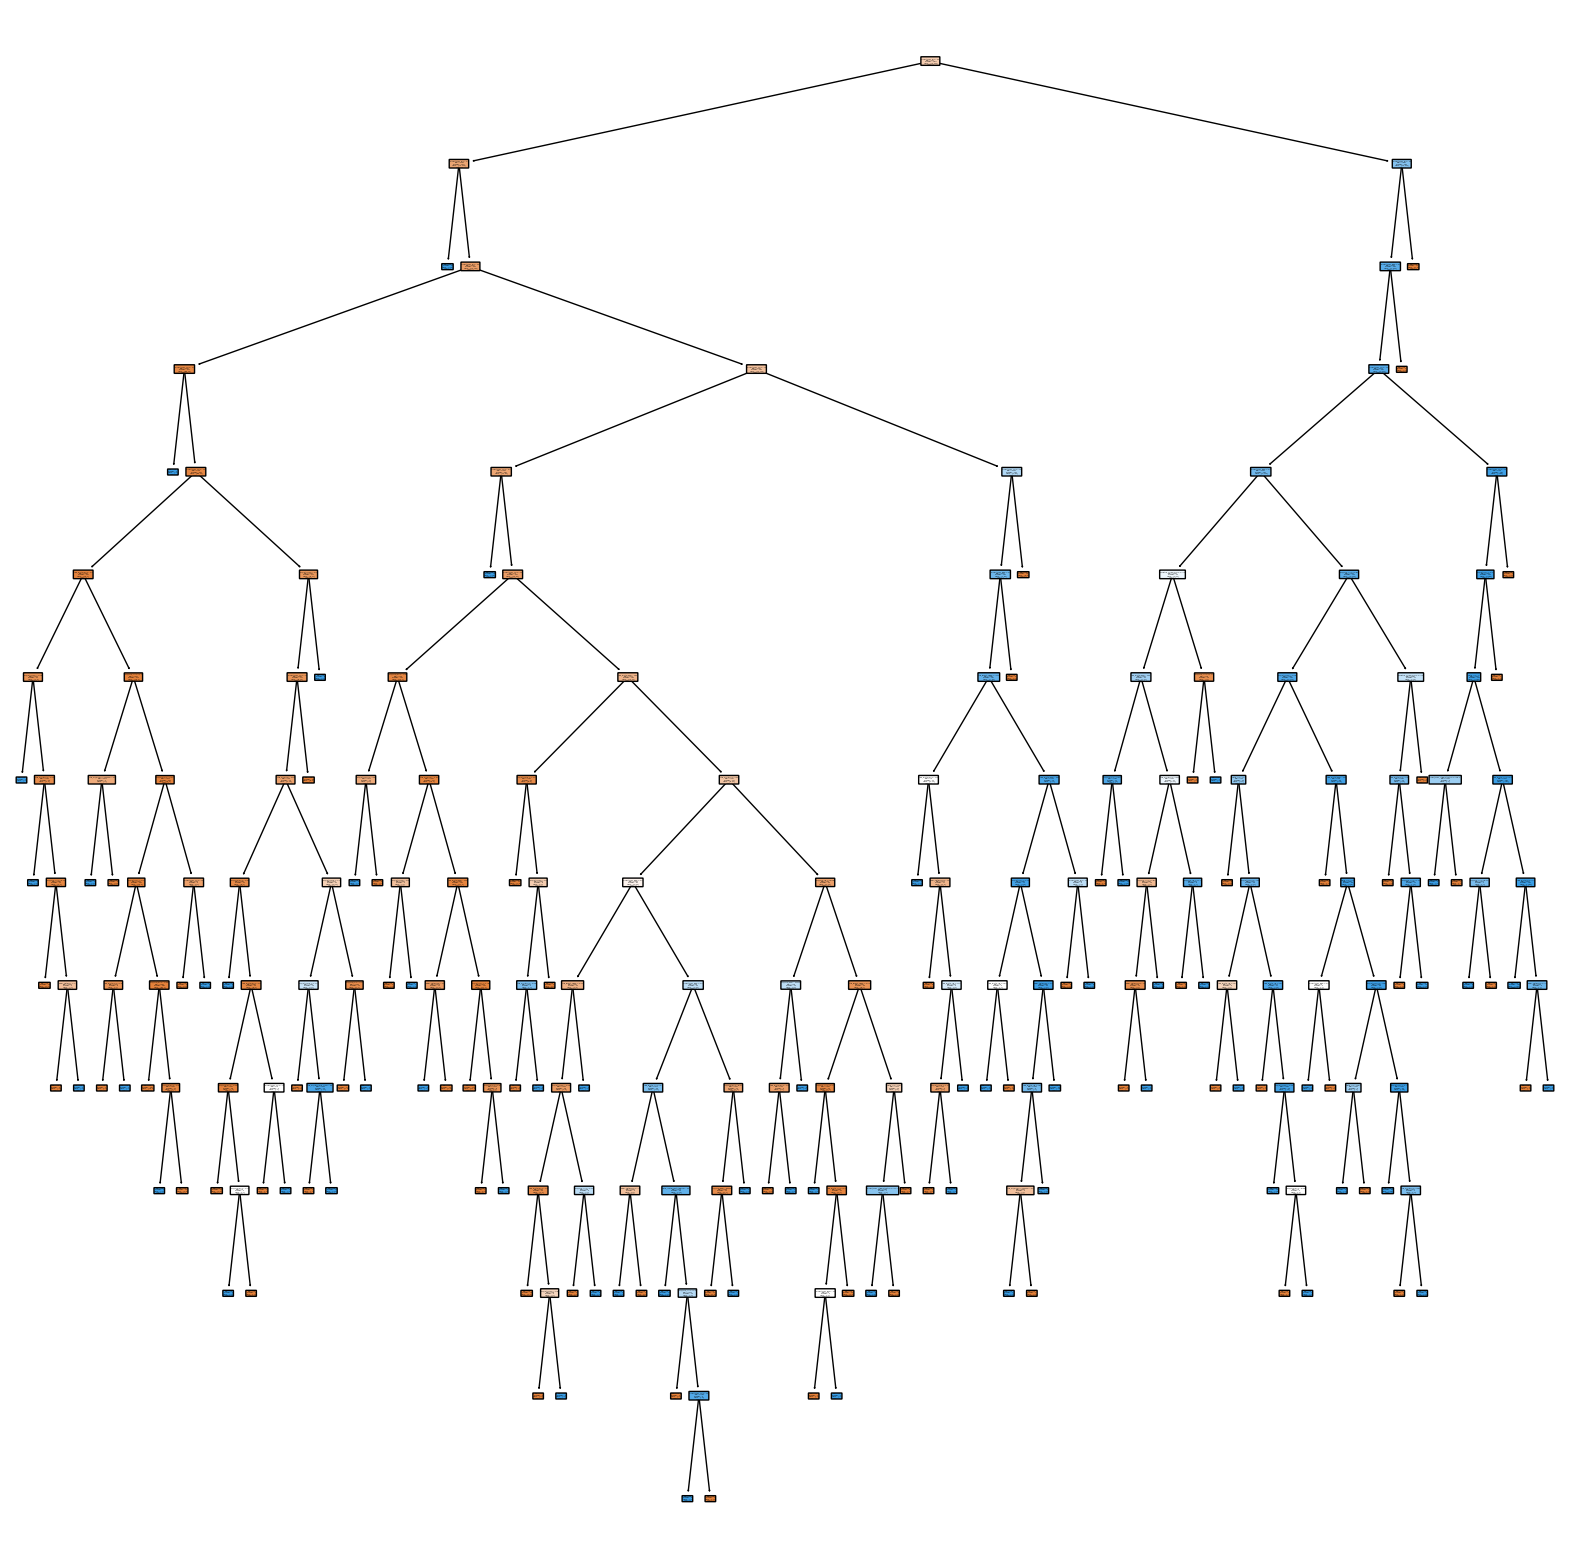

In [468]:
plt.figure(figsize=(20,20))
plot_tree(dt, filled=True, rounded=True, class_names=['0','1','2','3','4'], feature_names=X_encoded.columns);

## Explain your model to a business executive. Your explanation should include the following:
## Your data exploration findings, initial hypothesis, and whether the hypothesis proved true.

Data Exploration and Findings: I went through the original dataset thoroughly and came across the following:
1. There is not much correlation between Gender and the converted_Fri columns which means that it cannot be said that men are more likely to convert on Friday vs women. 
2. There was not much correlation between the marketing channels and converted_Fri either. However, the users who were 'organic' were least likely to convert. This was a surprising finding as my initial hypothesis was that if a user is likely to find the website on their own, they might easily convert.
3. There was also not much relation between the visitor location and the converted_Fri column, which indicates that the location of the visitors does not have a huge role to play in the conversion. However, visitors from South America have a slightly better chance of converting than the rest of the geographies.

My original hypothesis was as follows: 
Visitors who spend the most amount of time on the website throughout the week end up converting by the end of the week. Users with higher total views and also users who are viewing more expensive items are more likely to convert as they might be more serious about the purchase. It can also be said that individuals who are viewing on average the highest rated products will convert more. Additionally, individuals who have reached the site organically should have a higher chance of converting. 

As mentioned in the previous markdown block, the second part of my hypothesis was proved wrong as not a lot of individuals who are visiting the site organically are actually converting. I created variables to see the total average price, total average rating and total product views. I created boxplots so that I can visualise any relation between these variables with the output variable. There is a slight correlation and it can be said that my hypothesis was correct in this case. However, the correlation is not as significant as one might expect.








## Your approach for building and evaluating the model. 

Feature Engineering: After cleaning the data, I focused on feature engineering. I created new variables called total_avg_price, total_avg_rating, total_product_views. I created another variable called product_views_rating_interaction but decided not to use it later on as I was also using bins for the previous 3 variables I created. This meant that I had already created a total of 6 new variables. I evaluated the models I built by using F1, recall and precision. For finally deciding, which model to choose for the business, I used accuracy score. Accuracy is the number of correct predictions over the total predictions and this will be a good way to evaluate the problem specifically for this business

## The final model you selected and how you know this is the best model for the problem.

Since, this is a classification problem, I have decided to go ahead with KNN as being the model of my choice. The reasons are as follows:
1. KNN had a high accuracy score of almost 80% which is the industry standard. Decision tree model had a very high accuracy too but because there is a good chance of overfitting, I did not select the Decision tree model. Since, this is a binary classification case, decision tree will not be the best model here. From a business perspective, I have to consider that overfitting will lead to more innacurate prediction when it comes to conversions. This can be detrimental to the business as the business will be making decisions based on the model's predictions
2. KNN has a lot of benefits too. KNN is easy to use and it also does not take in any assumptions. We can also use a variety of distance criteria to choose to improve the model. Infact, the accuracy increased significantly for this model once I did hyperparameter tuning.


## How the model should be used by the business, in business process.

The business should keep using the model in the future for the following reasons:
1. User Rating System: The business can internally use the model to categorise the users into low, medium, high. the categories here represent the likelihood of conversion. This will help the business target users in different categories differently from a marketing perspective to increase the chances of conversion. Someone who is highly likely to convert will not need to see a lot of ads from the business and so on.
2. Data Monetization: Since, the business already has a lot of relevant data about its users, the business can use this data to find patterns for successful marketing(similar to the case here). This data can be shared with marketing executives while adhering to data privacy laws so that they can come up with newer marketing strategies.

## What are the characteristics of users who convert (behavioural and demographic)?

Behavioural: Visitors who spend the most amount of time on the website throughout the week are somewhat likely to end up converting by the end of the week. Users with higher total views and also users who are viewing more expensive items are somewhat likely to convert as they might be more serious about the purchase.

Demographic: There is not much correlation between Gender and the converted_Fri columns which means that it cannot be said that men are more likely to convert on Friday vs women. 
There was not much correlation between the marketing channels and converted_Fri either. However, the users who were 'organic' were least likely to convert. This was a surprising finding as my initial hypothesis was that if a user is likely to find the website on their own, they might easily convert.
There was also not much relation between the visitor location and the converted_Fri column, which indicates that the location of the visitors does not have a huge role to play in the conversion. However, visitors from South America have a slightly better chance of converting than the rest of the geographies.